# Solving for eigenvalues and eigenvectors

We saw in the previous notebook how to set up a matrix by integrating between pairs of basis functions.  In this notebook we will solve for the eigenvalues and eigenvectors of the Hamiltonian for a square well, exploring what happens when we use a finite basis set, and introduce changes to the potential in the square well.

## Eigenbasis, adding potential

We will start by using the eigenbasis (since it's simple) and will add small changes to the potential.  This will give us some insight into the effect of perturbations (and will feed directly into our studies of perturbation theory).

First we import the necessary libraries

In [1]:
# Import libraries and set up in-line plotting.
%pylab --no-import-all inline
# This is a new library - linear algebra includes solving for eigenvalues & eigenvectors of matrices
import numpy.linalg as la

Populating the interactive namespace from numpy and matplotlib


In the previous notebook we saved the definitons of the eigenstates in the file `eigenstates.py`. Let's have a look at this file to remind ourselves (Unfortunately %load seems to be broken in the web-based notebook interface (slightly broken) and EIN (completely broken) in two distinct ways, so we'll hack around it with !cat and %run for now. But *some* solid means of avoiding cut'n'paste code reuse must be found!)

In [2]:
!cat eigenstates.py

# coding: utf-8
number_of_base_states = 10 # The number of base states we want to consider
from numpy import sin, pi, sqrt # Because using np.sin and np.pi etc. is annoying

# Define the x-axis
width = 1.0
num_x_points = 101
x = np.linspace(0.0,width,num_x_points)
dx = width/(num_x_points - 1)

def eigenbasis_sw(n,width,x):
    """The eigenbasis for a square well, running from 0 to a (width), sin(n pi x/a)."""
    fac = pi*n/width
    return sin(fac*x)

def d2eigenbasis_sw(n,width,x):
    """The second derivative of the eigenbasis for a square well,
    running from 0 to a, sin(n pi x/a)"""
    fac = pi*n/width
    return -fac*fac*sin(fac*x)

unnormalised_eigenbases   = np.array([   eigenbasis_sw(n,width,x) for n in range(1,number_of_base_states+1) ])
d2unnormalised_eigenbases = np.array([ d2eigenbasis_sw(n,width,x) for n in range(1,number_of_base_states+1) ])
def integrate_function(f, dx):
    """Integrate a function approximated by a numpy array with spacing dx"""
    return sum(f)*d

Now we'll execute the above code inside this notebook

In [3]:
%run -i eigenstates.py

We have now set up all the mechanics that we need to create matrices for different Hamiltonians, except for one thing: the potential.  We have an implicit potential already in the infinite square well (we set $V=\infty$ when $x=0$ or $x=a$).  If we create a potential function, then we can change this and create different Hamiltonian matrices.  So we'll do this next.

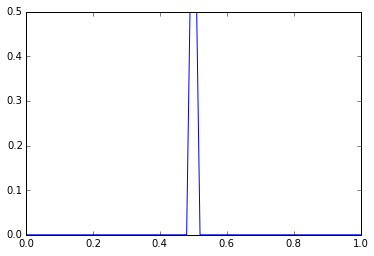

In [4]:
def square_well_potential(x,a): # TODO This name seems wrong
    mid = x.size // 2
    V = np.zeros_like(x)
    V[mid-1:mid+2] = [a]*3 # [a,a,a]
    return V

Vbump = square_well_potential(x,0.5)
plt.plot(x, Vbump);

## Solving for the eigenvalues

Now that we have the potential, we need to build the matrix (remember that we have set $\hbar = m = 1$):
$H_{mn} = \langle \phi_m \vert -\frac{1}{2}\nabla^2 + \hat{V}\vert\phi_n\rangle$

In [5]:
def Hamiltonian(V, psi, d2psi):
    return KE_term(d2psi) + PE_term(V, psi)

def KE_term(d2psi):
    return -d2psi / 2

By diagonalisation, we will find the eigenvalues.

It's worth noting that we act with $\hat{V}$ by multiplication in position representation:

$$\langle x \vert \hat{V} \vert \phi_m\rangle = V(x) \phi_m(x)$$

In [6]:
def PE_term(V, psi):
    return V * psi

Then we make matrix elements by integration in position representation; as we've defined a grid on which to represent the system, we'll just sum over the values on the grid (though there are much more accurate ways to do numerical integration).

$$H_{ij} = \langle \phi_i \vert \hat{H} \vert \phi_j \rangle = \int dx \phi_i^\star(x) \hat{H} \phi_j(x)$$

We will print out the matrix of _just_ the potential first: $\langle \phi_m \vert \hat{V} \vert \phi_n\rangle$.  This will be useful when thinking about perturbation theory (the change in eigenvalues should be the same as the diagonal elements of the potential matrix, to first order in the potential).

In [7]:
# Version 1: hand-written loops
print "Potential matrix elements:"
for phi_n in normalised_eigenbases:
    # Loop over basis functions phi_m (the ket in the matrix element)
    for phi_m in normalised_eigenbases:
        # Create matrix element by integrating
        H_mn = integrate_function(phi_n * PE_term(Vbump, phi_m), dx)
        # The comma at the end prints without a new line; the %8.3f formats the number
        print "%8.3f" % H_mn,
    # This print puts in a new line when we have finished looping over m
    print

print
print "Full Hamiltonian"
# Loop over basis functions phi_n (the bra in the matrix element)
# Calculate and store the matrix elements for the full Hamiltonian
for phi_n in normalised_eigenbases:
    # Loop over basis functions phi_m (the ket in the matrix element)
    for phi_m, d2phi_m in zip(normalised_eigenbases, d2normalised_eigenbases):
        # Create matrix element by integrating
        H_mn = integrate_function(phi_n * Hamiltonian(Vbump, phi_m, d2phi_m), dx)
        # The comma at the end prints without a new line; the %8.3f formats the number
        print "%8.3f" % H_mn,
    # This print puts in a new line when we have finished looping over m
    print

Potential matrix elements:
   0.030    0.000   -0.030   -0.000    0.030    0.000   -0.030   -0.000    0.029    0.000
   0.000    0.000   -0.000   -0.000    0.000    0.000   -0.000   -0.000    0.000    0.000
  -0.030   -0.000    0.030    0.000   -0.030   -0.000    0.029    0.000   -0.029   -0.000
  -0.000   -0.000    0.000    0.000   -0.000   -0.000    0.000    0.001   -0.000   -0.001
   0.030    0.000   -0.030   -0.000    0.030    0.000   -0.029   -0.000    0.029    0.000
   0.000    0.000   -0.000   -0.000    0.000    0.001   -0.000   -0.001    0.000    0.001
  -0.030   -0.000    0.029    0.000   -0.029   -0.000    0.029    0.000   -0.029   -0.000
  -0.000   -0.000    0.000    0.001   -0.000   -0.001    0.000    0.001   -0.000   -0.002
   0.029    0.000   -0.029   -0.000    0.029    0.000   -0.029   -0.000    0.028    0.000
   0.000    0.000   -0.000   -0.001    0.000    0.001   -0.000   -0.002    0.000    0.002

Full Hamiltonian
   4.965   -0.000   -0.030   -0.000    0.030    0.000  

But this is probably more clearly expressed with functions which calculate the terms and their components, and a list comprehension feeding into a numpy array. (TODO: Pick one for the final version):

In [8]:
# Version 2: Higher-level numpy utilies and list comprehensions
np.set_printoptions(precision=3, linewidth=180, suppress=True)

print "Potential matrix:"
Hmat = np.array([[integrate_function(phi_n *     PE_term(Vbump, phi_m         ), dx)
                  for phi_n in normalised_eigenbases]
                  for phi_m in normalised_eigenbases])
print Hmat

print "Full Hamiltonian matrix:"
Hmat = np.array([[integrate_function(phi_n * Hamiltonian(Vbump, phi_m, d2phi_m), dx)
                  for phi_n          in     normalised_eigenbases]
                  for phi_m, d2phi_m in zip(normalised_eigenbases, d2normalised_eigenbases)])
print Hmat

Potential matrix:
[[ 0.03   0.    -0.03  -0.     0.03   0.    -0.03  -0.     0.029  0.   ]
 [ 0.     0.    -0.    -0.     0.     0.    -0.    -0.     0.     0.   ]
 [-0.03  -0.     0.03   0.    -0.03  -0.     0.029  0.    -0.029 -0.   ]
 [-0.    -0.     0.     0.    -0.    -0.     0.     0.001 -0.    -0.001]
 [ 0.03   0.    -0.03  -0.     0.03   0.    -0.029 -0.     0.029  0.   ]
 [ 0.     0.    -0.    -0.     0.     0.001 -0.    -0.001  0.     0.001]
 [-0.03  -0.     0.029  0.    -0.029 -0.     0.029  0.    -0.029 -0.   ]
 [-0.    -0.     0.     0.001 -0.    -0.001  0.     0.001 -0.    -0.002]
 [ 0.029  0.    -0.029 -0.     0.029  0.    -0.029 -0.     0.028  0.   ]
 [ 0.     0.    -0.    -0.001  0.     0.001 -0.    -0.002  0.     0.002]]
Full Hamiltonian matrix:
[[   4.965    0.      -0.03     0.       0.03     0.      -0.03     0.       0.029   -0.   ]
 [  -0.      19.739    0.      -0.       0.       0.       0.      -0.      -0.       0.   ]
 [  -0.03     0.      44.443    0.      

Version 3: Express this

$$H_{ij} = \langle \phi_i \vert \hat{H} \vert \phi_j \rangle = \int dx \phi_i^\star(x) \hat{H} \phi_j(x)$$

as a higher-order function (because it most closely resembles the maths!)

In [9]:
def build_matrix(operator, V, bases, d2bases):
    return np.array([[integrate_function(phi_n * operator(V, phi_n, d2phi_n, phi_m, d2phi_m), dx)
                      for phi_n, d2phi_n in zip(bases, d2bases)]
                      for phi_m, d2phi_m in zip(bases, d2bases)])

For this to work, we must make the interfaces of `PE_term`, `KE_term` and `Hamiltonian` uniform

In [10]:
def Hamiltonian(V, psi_n, d2psi_n, psi_m, d2psi_m):
    return (KE_term(V, psi_n, d2psi_n, psi_m, d2psi_m) +
            PE_term(V, psi_n, d2psi_n, psi_m, d2psi_m))

def     PE_term(V, psi_n, d2psi_n, psi_m, d2psi_m):
    return V * psi_m

def     KE_term(V, psi_n, d2psi_n, psi_m, d2psi_m):
    return -d2psi_m / 2

With these in place, calculating any matrix is done with a very high level command (it merely says what you want to do: if you care about how it's done, you can look at the definition, but you're not forced to parse it here and now.)

In [11]:
print  build_matrix(PE_term,     Vbump, normalised_eigenbases, d2normalised_eigenbases)
Hmat = build_matrix(Hamiltonian, Vbump, normalised_eigenbases, d2normalised_eigenbases)
print Hmat

[[ 0.03   0.    -0.03  -0.     0.03   0.    -0.03  -0.     0.029  0.   ]
 [ 0.     0.    -0.    -0.     0.     0.    -0.    -0.     0.     0.   ]
 [-0.03  -0.     0.03   0.    -0.03  -0.     0.029  0.    -0.029 -0.   ]
 [-0.    -0.     0.     0.    -0.    -0.     0.     0.001 -0.    -0.001]
 [ 0.03   0.    -0.03  -0.     0.03   0.    -0.029 -0.     0.029  0.   ]
 [ 0.     0.    -0.    -0.     0.     0.001 -0.    -0.001  0.     0.001]
 [-0.03  -0.     0.029  0.    -0.029 -0.     0.029  0.    -0.029 -0.   ]
 [-0.    -0.     0.     0.001 -0.    -0.001  0.     0.001 -0.    -0.002]
 [ 0.029  0.    -0.029 -0.     0.029  0.    -0.029 -0.     0.028  0.   ]
 [ 0.     0.    -0.    -0.001  0.     0.001 -0.    -0.002  0.     0.002]]
[[   4.965    0.      -0.03     0.       0.03     0.      -0.03     0.       0.029   -0.   ]
 [  -0.      19.739    0.      -0.       0.       0.       0.      -0.      -0.       0.   ]
 [  -0.03     0.      44.443    0.      -0.03     0.       0.029   -0.      -0.029 

Notice that two things have changed compared to the perfect square well: first, the diagonal elements are _slightly_ larger; second, there are now off-diagonal elements.  Does it surprise you that these alternate (i.e. only in odd row and columns) ? Think about the symmetries of the system, particularly of the wavefunctions.

What effect will this have on the eigenvalues and eigenvectors ? We'll diagonalise, print out the eigenvalues and plot the first few eigenvectors (as well as looking at their coefficients to get a rough idea of how much they've changed).

In [12]:
# Solve using linalg module of numpy (which we've imported as la above)
eigval, eigvec = la.eigh(Hmat)
# This call above does the entire solution for the eigenvalues and eigenvectors !
# Print results roughly, though apply precision of 4 to the printing
np.set_printoptions(precision=4)
print "Eigenvalues:"
print eigval
show_N_eigvectors = 3
print "First", show_N_eigvectors, "eigenvectors:"
print eigvec[:show_N_eigvectors]

Eigenvalues:
[   4.9647   19.7393   44.443    78.9571  123.3996  177.6536  241.8344  315.8286  399.7474  493.4821]
First 3 eigenvectors:
[[ 1.     -0.      0.0008 -0.     -0.0003  0.     -0.0001  0.     -0.0001  0.    ]
 [ 0.      1.      0.     -0.      0.      0.     -0.      0.      0.     -0.    ]
 [ 0.0008  0.     -1.     -0.      0.0004  0.      0.0001  0.      0.0001 -0.    ]]


We can see that the eigenvalues look close to the perfect well values (we'll check them properly below).  The eigenvector coefficients show a single dominant value (corresponding to the unperturbed eigenvector), with very small contributions from other eigenvectors.  Now print the eigenvalues and calculate the change.

In [13]:
print " Changed Original  Difference"
for n,eig in enumerate(eigval,start=1):
    print "%8.3f %8.3f %8.3f" % (eig, n*n*pi*pi/2, eig - n*n*pi*pi/2)

 Changed Original  Difference
   4.965    4.935    0.030
  19.739   19.739    0.000
  44.443   44.413    0.030
  78.957   78.957    0.000
 123.400  123.370    0.030
 177.654  177.653    0.001
 241.834  241.805    0.029
 315.829  315.827    0.001
 399.747  399.719    0.028
 493.482  493.480    0.002


Compare the differences in eigenvalues due to the small potential we've added to the diagonal terms of the potential matrix.  How close is the agreement ? You might like to change the magnitude of the potential (higher up - it's passed as an argument to the potential function) and see how this agreement changes.

Now we'll plot the eigenvectors (after building them) and look at the change with respect to the eigenvectors of the original system.  Remember that any function in this space can be written as:

$$\vert\psi\rangle = \sum_i c_i \vert \phi_i \rangle$$

We'll use this to build the eigenfunctions of the perturbed system.  In this case, $c_i$ are the coefficients in the eigenvector of the matrix, and $\vert\phi_i\rangle$ are the basis functions.

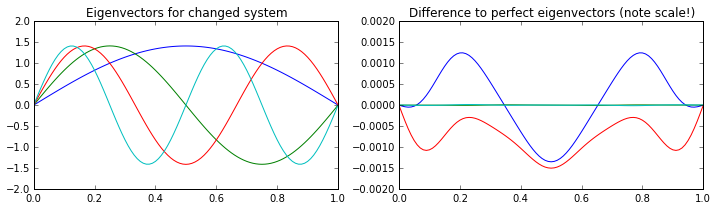

In [14]:
# Version 1: hand-coded loop
# Define a figure to take two plots
fig = plt.figure(figsize=(12,3))
# Add subplots: number in y, x, index number
ax  = fig.add_subplot(121, autoscale_on=False, xlim=(0,1), ylim=(-2,    2    ))
ax2 = fig.add_subplot(122, autoscale_on=False, xlim=(0,1), ylim=(-0.002,0.002))
ax .set_title("Eigenvectors for changed system")
ax2.set_title("Difference to perfect eigenvectors (note scale!)")

for m, eigenvector in enumerate(eigvec[:4]): # Plot the first four states
    psi = np.dot(eigenvector, normalised_eigenbases)
    if eigvec[m,m] < 0:  # This is just to ensure that psi and the basis function have the same phase
        psi = -psi
    ax.plot(x,psi)
    # Now subtract the unperturbed eigenvector to see the change from the perturbation
    psi = psi - normalised_eigenbases[m]
    ax2.plot(x,psi)

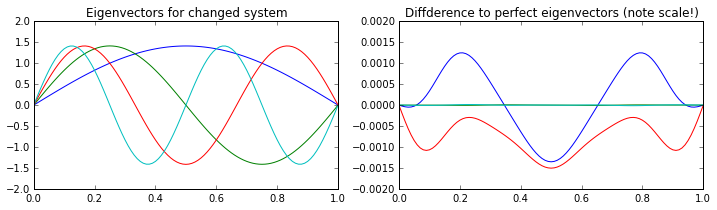

In [15]:
# Version 2: numpy functions and list comprehensions
# Define a figure to take two plots
fig = plt.figure(figsize=(12,3))
# Add subplots: number in y, x, index number
ax  = fig.add_subplot(121, autoscale_on=False, xlim=(0,1), ylim=(-2,    2    ))
ax2 = fig.add_subplot(122, autoscale_on=False, xlim=(0,1), ylim=(-0.002,0.002))
ax .set_title("Eigenvectors for changed system")
ax2.set_title("Diffderence to perfect eigenvectors (note scale!)")

N = 4
perturbed_eigenstates = [ np.dot(eigenvector, normalised_eigenbases) for eigenvector in eigvec[:N] ]
# Ensure that the phases of the psis and the basis functions match
signs_on_diagonal = np.sign(eigvec[:N].diagonal())
perturbed_eigenstates = [ sign * psi for (sign, psi) in zip(signs_on_diagonal, perturbed_eigenstates)]

perturbations = [ psi - phi for (psi, phi) in zip(perturbed_eigenstates, normalised_eigenbases) ]
for (psi, perturbation) in zip(perturbed_eigenstates, perturbations):
    ax .plot(x, psi)
    ax2.plot(x, perturbation)

Notice how the eigenvectors for this changed system are *very* close to the original system.  This is a perfect example of a good system to study with perturbation theory.  The changes in the eigenvectors can be related to matrix elements of the potential and the eigenvalues of the unperturbed system, but we won't do this just yet.

In the next notebook, we will explore a more complex perturbation (a truncated quantum harmonic oscillator, or QHO) and the effects of varying the magnitude of the perturbation.  As well as improving your understanding of matrix mechanics, this should give a useful insight into the limitations of perturbation theory and finite basis sets.